## 04. [14032024] Cloning Quasars

* Download the SDSS quasara data
* Upsample this distribution in two ways, using both rejection sampling and inverse transform.
* Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures) (Hint: scipy.stats is your best friend)
* Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data (Hint: astropy.cosmology is another close friend).
The best-fit cosmological model from the Planck data is:

`import astropy` \
`astropy.cosmology.Planck15`

In [1]:
import numpy as np
import itertools
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution
from astroML.datasets import fetch_dr7_quasar

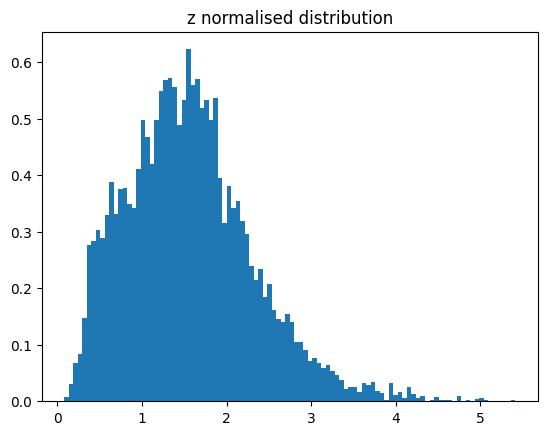

In [2]:
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

#print(np.max(z), np.min(z))

plt.hist(z, bins=100, density=True)
counts, bins = np.histogram(z, bins=100, density=True)
plt.title ("z normalised distribution")
plt.show()

#print(counts, bins.shape)

### Rejection Sampling

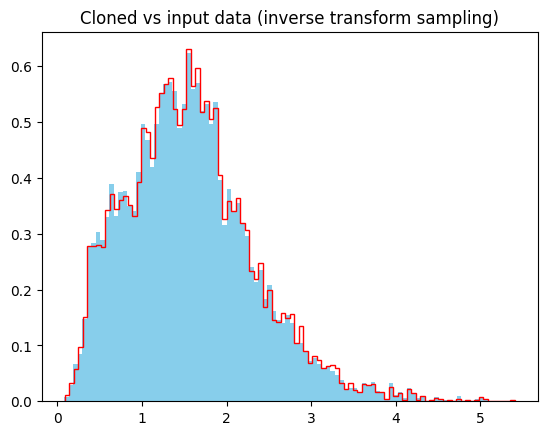

In [24]:
N = 100000

ymax = 0.65
x = np.random.uniform(0, 5.5, N)
y = np.random.uniform(0, ymax, N)
#plt.scatter(x, y)
#plt.show()

goodpoints_list = []

for i in range(counts.size): #going through each bin
    bin_filter = (x >= bins[i]) & (x < bins[i+1])
    x_in_bin = x[bin_filter]
    y_in_bin = y[bin_filter]
    goodpoints_list.append(x_in_bin[y_in_bin <= counts[i]])

goodpoints = list(itertools.chain.from_iterable(goodpoints_list))

fig, ax = plt.subplots()
ax.hist(z, bins=100, histtype='stepfilled', density=True, color='skyblue', label='input data')
ax.hist(goodpoints, bins=100, histtype='step', density=True, color='red', label='cloned data')
ax.set_title ("Cloned vs input data (inverse transform sampling)")
plt.show()


### Inverse Transform Sampling

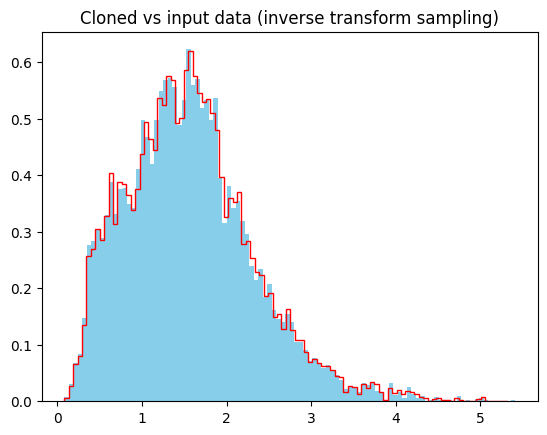

In [25]:
# clone the distribution
z_cloned = EmpiricalDistribution(z).rvs(N)

fig, ax = plt.subplots()
ax.hist(z, bins=100, histtype='stepfilled', density=True, color='skyblue', label='input data')
ax.hist(z_cloned, bins=100, histtype='step', density=True, color='red', label='cloned data')
ax.set_title ("Cloned vs input data (inverse transform sampling)")
plt.show()

what is the theoretical quasar distribution supposed to be ?????